# R OBIS

This notebook was adapted from [a manual on robis](https://obis.org/manual/accessr/) on the [obis](obis.org) site. Some of the mapping functions weren't working properly, so we've put in some simple ggplot mapping and plotting examples.

## Loading robis

Installing the robis packages requires devtools. Use the following (this code won't run within the notebook.)

In [1]:
installed <- rownames(installed.packages())
if ( !("robis" %in% installed) ){
   if ( !("remotes" %in% installed) )install.packages("remotes")
   remotes::install_github("iobis/robis")
}

Once installed, load the robis package.

In [3]:
library(robis)

## Fetching occurences

OBIS contains global location data for marine taxa. 

To fetch all occurrences for a taxon, pass a taxon name or vector of taxon names to the occurrence() function. The names() function will give a list of the column names, so you know what data is included. You can see that there is quite a lot of information for each sample.

In [4]:
E.glacialis <- occurrence("Eubalaena glacialis")
names(E.glacialis)

Retrieved 5000 records of approximately 5917 (84%)
Retrieved 5917 records of approximately 5917 (100%)


[1] "rightsHolder"                  "date_year"                    
  [3] "institutionID"                 "scientificNameID"             
  [5] "year"                          "scientificName"               
  [7] "superfamilyid"                 "individualCount"              
  [9] "dropped"                       "aphiaID"                      
 [11] "language"                      "decimalLatitude"              
 [13] "subclassid"                    "type"                         
 [15] "phylumid"                      "familyid"                     
 [17] "catalogNumber"                 "occurrenceStatus"             
 [19] "basisOfRecord"                 "superclass"                   
 [21] "modified"                      "maximumDepthInMeters"         
 [23] "id"                            "day"                          
 [25] "order"                         "organismQuantity"             
 [27] "superclassid"                  "verbatimEventDate"            
 [29] "infraorderid"                  "sampleSizeUnit"               
 [31] "dataset_id"                    "decimalLongitude"             
 [33] "collectionCode"                "speciesid"                    
 [35] "date_end"                      "occurrenceID"                 
 [37] "superfamily"                   "suborderid"                   
 [39] "license"                       "date_start"                   
 [41] "month"                         "genus"                        
 [43] "organismQuantityType"          "eventDate"                    
 [45] "eventID"                       "scientificNameAuthorship"     
 [47] "absence"                       "genusid"                      
 [49] "originalScientificName"        "marine"                       
 [51] "minimumDepthInMeters"          "subphylumid"                  
 [53] "vernacularName"                "institutionCode"              
 [55] "date_mid"                      "class"                        
 [57] "suborder"                      "infraorder"                   
 [59] "orderid"                       "datasetName"                  
 [61] "kingdom"                       "specificEpithet"              
 [63] "classid"                       "phylum"                       
 [65] "species"                       "subphylum"                    
 [67] "subclass"                      "datasetID"                    
 [69] "family"                        "category"                     
 [71] "kingdomid"                     "sampleSizeValue"              
 [73] "node_id"                       "flags"                        
 [75] "sss"                           "shoredistance"                
 [77] "sst"                           "bathymetry"                   
 [79] "associatedReferences"          "taxonRemarks"                 
 [81] "recordNumber"                  "georeferencedDate"            
 [83] "dateIdentified"                "ownerInstitutionCode"         
 [85] "bibliographicCitation"         "taxonRank"                    
 [87] "eventTime"                     "identificationRemarks"        
 [89] "nomenclaturalCode"             "footprintWKT"                 
 [91] "geodeticDatum"                 "taxonomicStatus"              
 [93] "waterBody"                     "coordinatePrecision"          
 [95] "occurrenceRemarks"             "fieldNumber"                  
 [97] "samplingProtocol"              "behavior"                     
 [99] "informationWithheld"           "recordedBy"                   
[101] "georeferencedBy"               "minimumElevationInMeters"     
[103] "maximumElevationInMeters"      "coordinateUncertaintyInMeters"
[105] "samplingEffort"                "identifiedBy"                 
[107] "georeferenceProtocol"          "verbatimDepth"                
[109] "locality"                      "depth"                        
[111] "country"                       "eventRemarks"                 
[113] "preparations"                  "sex"                          
[115] "typeS

## Mapping the data example

We'll use ggplot to show an example of plotting the data. You'll need the following packages.

In [1]:
library('ggplot2')
library("rnaturalearth")
library("rnaturalearthdata")

The ggplot package has a lot of plotting and mapping functionality. More introductory examples can be found [here](https://www.r-spatial.org/r/2018/10/25/ggplot2-sf.html).

For this example, first we put the latitude and longitude coordinates of the species sightings into a data frame called 'sites':

In [5]:
sites <- data.frame(longitude = E.glacialis$decimalLongitude, 
                    latitude = E.glacialis$decimalLatitude)

Then we load the mapping data to use in ggplot and run the plotting function

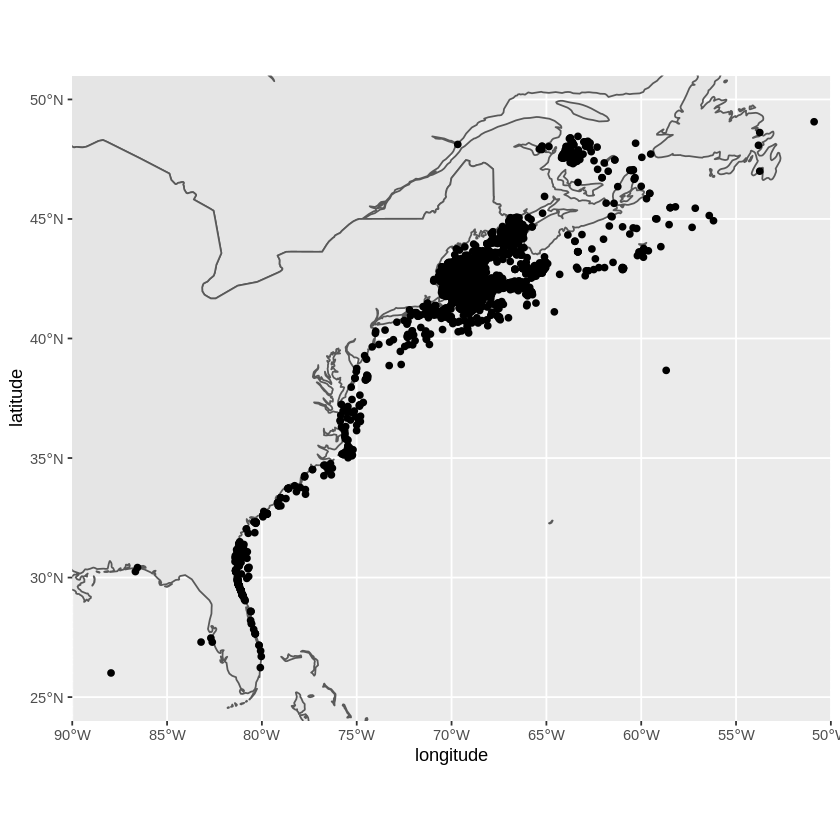

In [6]:
world <- ne_countries(scale = "medium", returnclass = "sf")
ggplot(data = world) +
    geom_sf() +
    geom_point(data = sites, aes(x = longitude, y = latitude)) +
    coord_sf(xlim = c(-90, -50), ylim = c(24, 51), expand = FALSE)

**Note**: there is a leafletMap function in the robis package. It's currently not working, but when working provides some nice mapping functionality.

## More fetching options with the occurrence() function

### Polygon filter

You can pull all records within a polygon using the same occurrence function. In this example, we pull the data from Casco Bay and make a stacked bar graph of all of the animal phyla recorded since the year 2000.

Retrieved 5000 records of approximately 9252 (54%)
Retrieved 9252 records of approximately 9252 (100%)
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


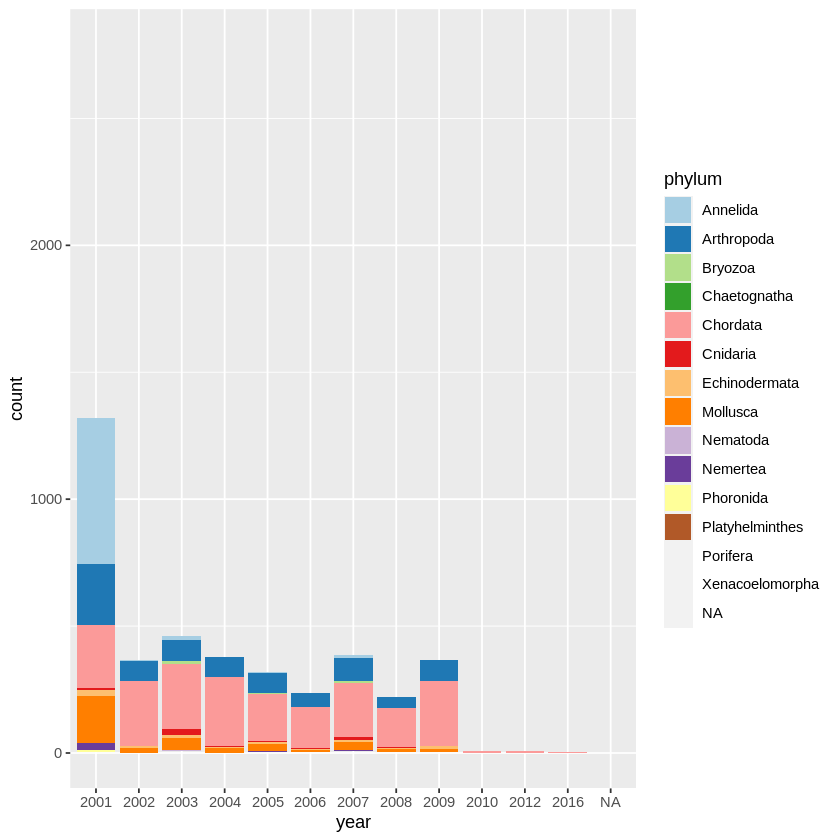

In [7]:
CascoBay <- occurrence(geometry = "POLYGON ((-70.2 43.5, -69.8 43.5, -69.8 43.9, -70.2 43.9, -70.2 43.5)) ")
ggplot() +
 geom_histogram(
   data = CascoBay[(CascoBay$year>2000 & CascoBay$kingdom=="Animalia"),], 
   aes(x = year, fill = phylum), binwidth = 5, stat="count") +
   scale_fill_brewer(palette = "Paired")

There are too many phyla to plot on this graph, so lets drill down taxonomically to class within Chordata, and then to species within Elasmobrancchi (sharks).

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


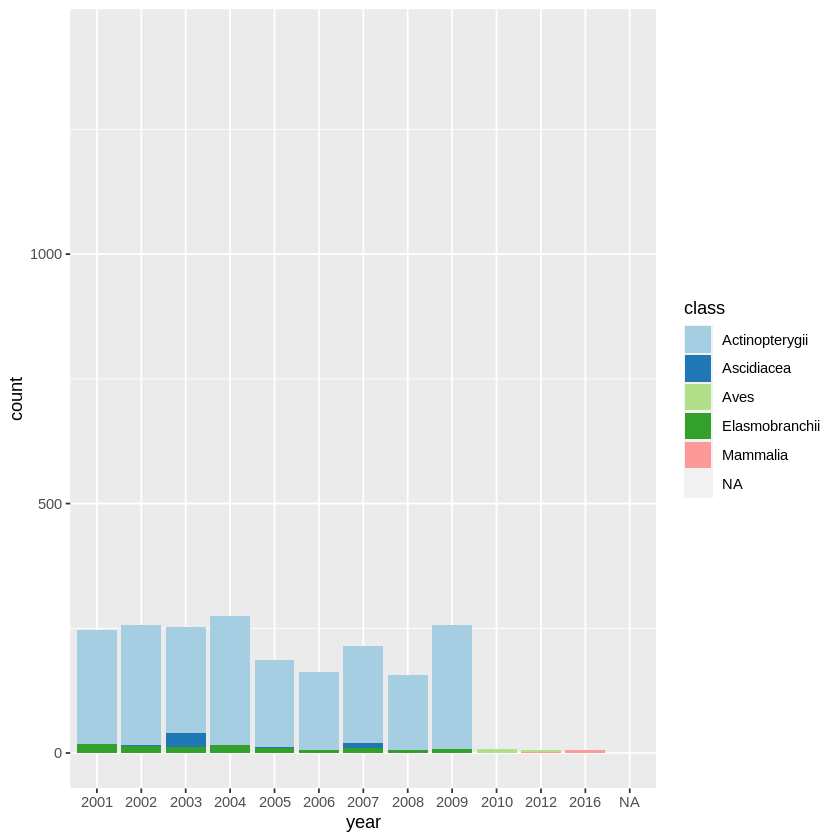

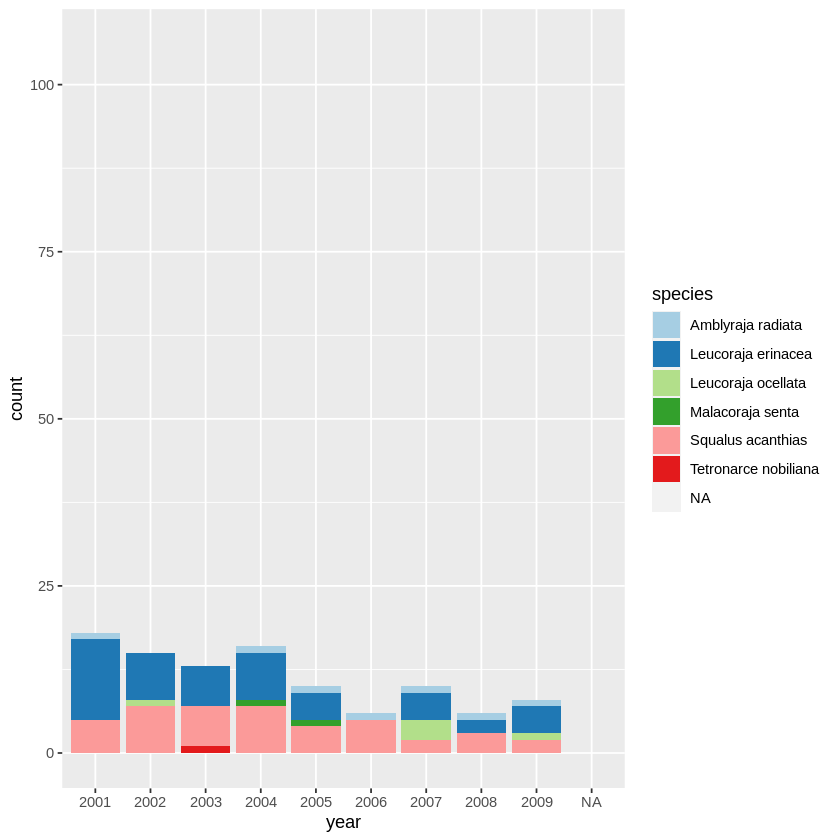

In [8]:
ggplot() +
 geom_histogram(
   data = CascoBay[(CascoBay$year>2000 & CascoBay$phylum=="Chordata"),], 
   aes(x = year, fill = class), binwidth = 5, stat="count") +
   scale_fill_brewer(palette = "Paired")
ggplot() +
 geom_histogram(
   data = CascoBay[(CascoBay$year>2000 & CascoBay$class=="Elasmobranchii"),], 
   aes(x = year, fill = species), binwidth = 5, stat="count") +
   scale_fill_brewer(palette = "Paired")

### Applying a depth filter

Occurrences between certain depth levels can be selected by using the startdepth and enddepth parameters. For example, to find shallow records of the Orange roughy (a deep sea fish which is being commercially exploited), do:

Retrieved 71 records of approximately 71 (100%)


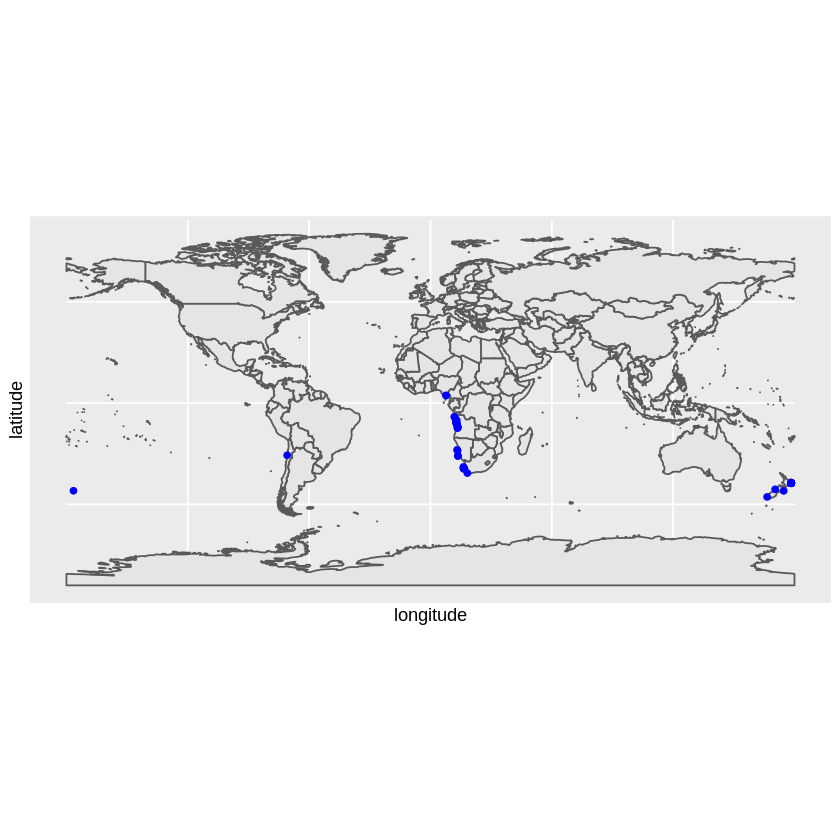

In [9]:
H.atlanticus <- occurrence("Hoplostethus atlanticus", enddepth = 400)
HAsites <- data.frame(longitude = H.atlanticus$decimalLongitude,
                      latitude=H.atlanticus$decimalLatitude)
ggplot(data = world) +
    geom_sf() +
    geom_point(data = HAsites, aes(x = longitude, y = latitude), colour='blue')


### Applying a date filter

To filter occurrences by date, use the startdate and enddate arguments. Make sure to use the correct date format:


Retrieved 191 records of approximately 191 (100%)


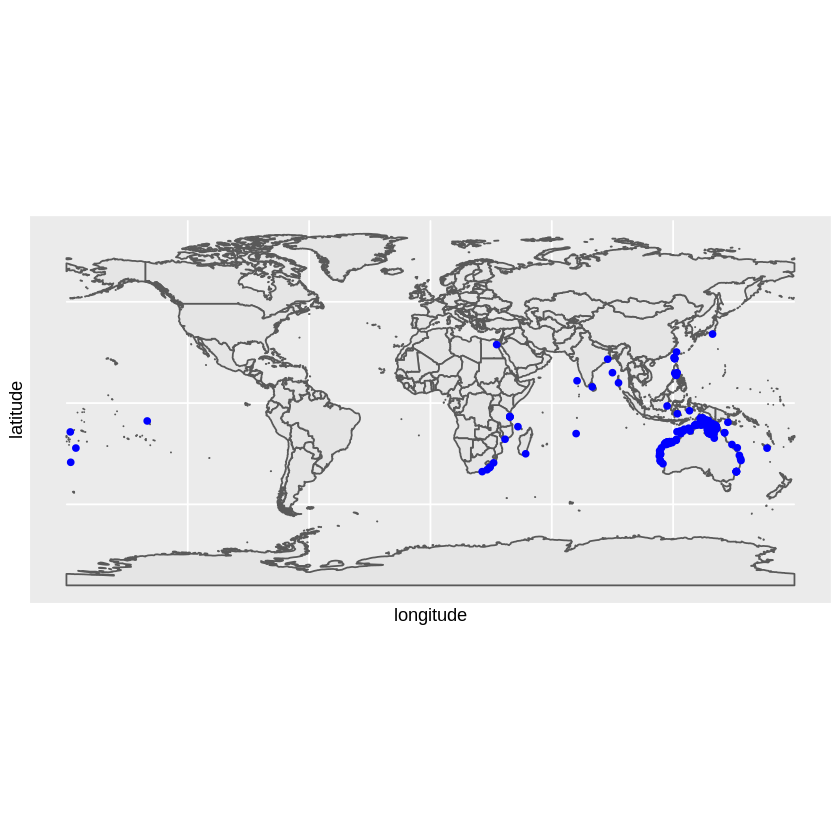

In [10]:
P.volitans <- occurrence("Pterois volitans", enddate = "1980-01-01")
PVsites <- data.frame(longitude = P.volitans$decimalLongitude,
                      latitude=P.volitans$decimalLatitude)
ggplot(data = world) +
    geom_sf() +
    geom_point(data = PVsites, aes(x = longitude, y = latitude), colour='blue')
